In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#from bokeh.io import show, output_file
#from bokeh.plotting import figure
from sklearn.preprocessing import StandardScaler
import os

import bokeh
from bokeh.plotting import figure, output_notebook, show

import bokeh.io
# this is here only for completeness to clarify where
# the methods are nested (you probably already imported this earlier)


bokeh.io.reset_output()
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
df = pd.read_csv("../ENIGMA_InterPro/InterPro_GO_summaries/go_aggregated_4.1_mixed_updated_ERZ652362_wheader.tsv", sep="\t", header=0)#, index_col=0)

In [3]:
df

,Unnamed: 0,id,study_id,sample_id,biome,exptype,version,GO:0043130,GO:0055074,GO:0055117,...,GO:0019357,GO:0006527,GO:0004114,GO:0046423,GO:0034194,GO:0032183,GO:0007618,GO:0030097,GO:0004520,GO:0033739
0,20850,ERZ652362,MGYS00003619,SRS1719142,root:Host-associated:Human:Digestive system:La...,assembly,4.1,0,0,0,...,3,2,1,0,0,0,0,0,12,6


In [4]:
df_mgnify = df.T
df_mgnify = df_mgnify.iloc[7:]
df_mgnify

,0
GO:0043130,0
GO:0055074,0
GO:0055117,0
GO:0046933,81
GO:0006302,2
...,...
GO:0032183,0
GO:0007618,0
GO:0030097,0
GO:0004520,12


In [5]:
df_new = pd.read_csv("../ENIGMA_InterPro/InterPro_GO_summaries/ERZ652362_FASTA.InterProScan.tsv.out", sep=",", header=None, index_col=0)

In [6]:
df_new

,1,2,3
0,,,
GO:0055085,transmembrane transport,biological_process,1166
GO:0006355,"regulation of transcription, DNA-templated",biological_process,1027
GO:0005975,carbohydrate metabolic process,biological_process,944
GO:0000160,phosphorelay signal transduction system,biological_process,438
GO:0007165,signal transduction,biological_process,343
...,...,...,...
GO:0050511,undecaprenyldiphospho-muramoylpentapeptide bet...,molecular_function,1
GO:0050567,glutaminyl-tRNA synthase (glutamine-hydrolyzin...,molecular_function,1
GO:0051266,sirohydrochlorin ferrochelatase activity,molecular_function,1


In [8]:
x = df_mgnify.index.values
y = df_new.index.values

xy = np.concatenate((x, y), axis=None)
print(len(xy))
xy = np.unique(np.concatenate((x, y), axis=None))
print(len(xy))

xy.sort()
xy

5848
4474


array(['GO:0000001', 'GO:0000002', 'GO:0000011', ..., 'GO:2001033',
       'GO:2001070', 'GO:2001256'], dtype=object)

In [9]:
revindices = np.where(np.in1d(x, xy))[0]
revindices2 = np.where(np.in1d(y, xy))[0]
print(len(revindices))
print(len(revindices2))

4402
1446


In [25]:
indices = np.where(np.in1d(xy, x))[0]
indices2 = np.where(np.in1d(xy, y))[0]
print(len(indices))
print(len(indices2))

4402
1446


In [26]:
xy[indices]

array(['GO:0000001', 'GO:0000002', 'GO:0000011', ..., 'GO:2001033',
       'GO:2001070', 'GO:2001256'], dtype=object)

In [27]:
xy[indices2]

array(['GO:0000015', 'GO:0000030', 'GO:0000034', ..., 'GO:1990610',
       'GO:1990961', 'GO:2001070'], dtype=object)

In [28]:
indices

array([   0,    1,    2, ..., 4471, 4472, 4473])

In [29]:
indices2

array([   5,    6,    7, ..., 4459, 4463, 4472])

In [147]:
x_data = np.empty([len(xy)], dtype='int')
y_data = np.empty([len(xy)], dtype='int')
print(len(x_data))
print(len(y_data))

x_data[indices] = df_mgnify[0].values
y_data[indices2] = df_new.loc[:,3].values

sum(np.equal(y_data,x_data))

4474
4474


1441

In [115]:
x_data = np.empty([len(xy)], dtype='float64')
y_data = np.empty([len(xy)], dtype='float64')
print(len(x_data))
print(len(y_data))

x_data[indices] = df_mgnify[0].values
y_data[indices2] = df_new.loc[:,3].values
print(np.count_nonzero(x_data))
print(np.count_nonzero(y_data))



4474
4474
1418
2413


In [116]:
sum(np.equal(y_data,x_data))


3053

In [109]:
#add jitter
low = 0.1
hi = 0.4
size1 = len(indices)
size2 = len(indices2)
samp1 = np.asarray([np.random.uniform(low,hi) for _ in range(size1)])
samp2 = np.asarray([np.random.uniform(low,hi) for _ in range(size2)])

print(np.max(x_data))
print(np.max(y_data))

x_data[indices] = np.add(x_data[indices], samp1)
y_data[indices2] = np.add(y_data[indices2], samp2)

print(np.max(x_data))
print(np.max(y_data))

print(len(x_data))
print(len(y_data))

2325.0
3.723644457712373e+280
2325.1030926687345
3.723644457712373e+280
4474
4474


In [110]:
sum(np.greater(y_data,x_data))

2728

In [111]:
sum(np.less(y_data,x_data))

1746

In [72]:
len(samp1)

4402

In [73]:
type(samp1)

numpy.ndarray

In [74]:
samp1[samp1< 0]

array([], dtype=float64)

In [75]:
len(x_data[indices])

4402

In [76]:
x_data[indices] 

array([ 0.17961366,  0.25008226,  0.33172494, ...,  0.38799627,
       12.35545924,  6.13889089])

In [77]:
y_data[indices2]

array([1.16628176e+03, 1.02725208e+03, 9.44346386e+02, ...,
       1.23116775e+00, 1.25931792e+00, 1.11626243e+00])

In [78]:
y_data[y_data< 0]

array([], dtype=float64)

In [95]:
y_data[y_data - x_data == 0]

array([], dtype=float64)

In [79]:
df_new.loc[:,3]

0
GO:0055085    1166
GO:0006355    1027
GO:0005975     944
GO:0000160     438
GO:0007165     343
              ... 
GO:0050511       1
GO:0050567       1
GO:0051266       1
GO:0051741       1
GO:0070204       1
Name: 3, Length: 1446, dtype: int64

In [80]:
df_mgnify[0]

GO:0043130     0
GO:0055074     0
GO:0055117     0
GO:0046933    81
GO:0006302     2
              ..
GO:0032183     0
GO:0007618     0
GO:0030097     0
GO:0004520    12
GO:0033739     6
Name: 0, Length: 4402, dtype: object

In [81]:
print(len(x_data))
print(len(y_data))

4474
4474


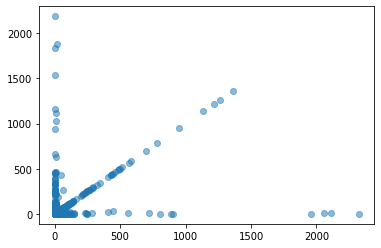

In [86]:
plt.scatter(x_data, y_data, alpha=0.5)
plt.show()

/Users/marcin/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


(array([  3.,  18.,  97., 514., 925.,  27.,  91.,  64.,  21.,  10.]),
 array([-4.1834115 , -3.42844993, -2.67348836, -1.91852679, -1.16356523,
        -0.40860366,  0.34635791,  1.10131947,  1.85628104,  2.61124261,
         3.36620417]),
 <BarContainer object of 10 artists>)

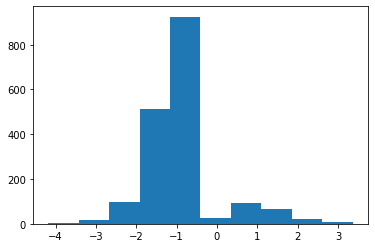

In [92]:
plt.hist(np.log10(x_data-y_data))

In [93]:
a=figure(plot_width = 500, plot_height=500)
#key = [1,2]
#value = [2,2]
#a.circle(key, value,size=3,color='red', fill_alpha = 0.5)
a.circle(x_data, y_data, size=3, color = 'blue', fill_alpha = 0.5)

# show the plot.
show(a)